Ramon Muñoz - A01330566

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import warnings
warnings.filterwarnings('ignore')

Importa la base de datos

In [2]:
url="target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [3]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [5]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

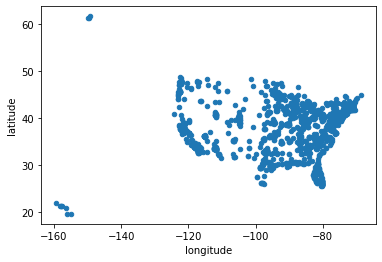

In [6]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [7]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [9]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [10]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [11]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [12]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

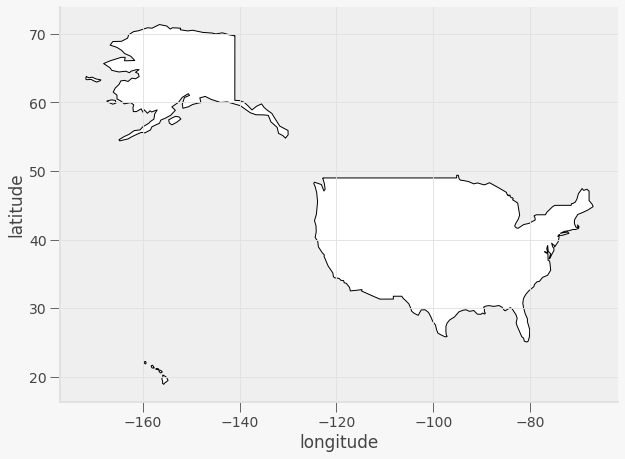

In [13]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

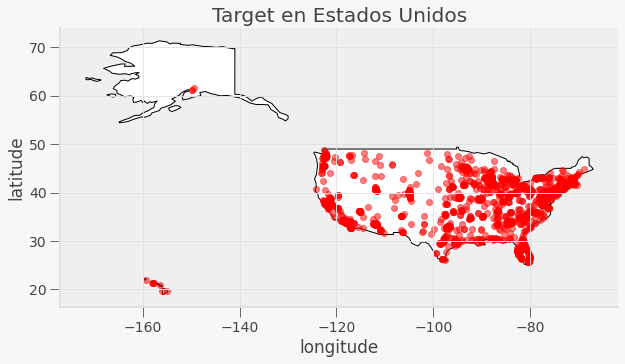

In [14]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

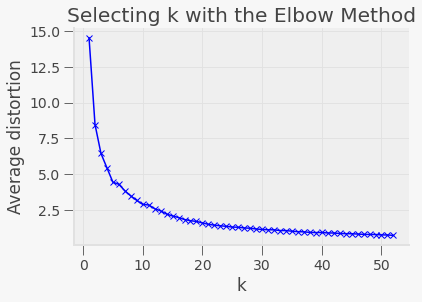

In [15]:
#tu codigo aquí
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,53)
meanDistortions=[]

df_stores = df[["latitude","longitude"]].copy()

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_stores)
    prediction=model.predict(df_stores)
    meanDistortions.append(sum(np.min(cdist(df_stores, model.cluster_centers_, 'euclidean'), axis=1)) / df_stores.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Usamos el Elbow method para ver el número óptimo de clusters. Para usar este, ponemos un rango de posibles clusters (en este caso de 1 a 52 dados los estados de USA) y de ahi para cada número de clusters K, calcula el score de cada cluster. Para seleccionar el número de clusters óptimo, nos iremos a donde está el "codo" de la gráfica. Este nos muestra en que punto nos topamos con valor bueno de la distorción, sin generar clusters de más.

Podemos ver que el elbow de la gráfica esta en 4 Clusters, por lo que ese es el punto óptimo. Esto quiere decir que un número bueno de almacenes será de 4.

Dicho esto, generaremos el modelo final con el número de clusters sugerido.

In [16]:
from sklearn.cluster import KMeans
dfFinal = df_stores.copy()
GoodModel=KMeans(n_clusters = 4)
GoodModel.fit(dfFinal)
gps = GoodModel.predict(dfFinal)



#Append the prediction 
dfFinal["GROUP"] = gps

HouseType = []
for i in range(0,len(gps)):
    HouseType.append("Store")
dfFinal["Type"] = pd.Series(HouseType, copy=False)

Ahora que ya tenemos los clusters, vamos a agruparlos por cluster y obtendremos la locación ideal de los almacenes sacando el centroide los grupos

In [17]:
StoreHouseClust = dfFinal.groupby(['GROUP'])
StoreHouseClust.mean()

,latitude,longitude
GROUP,,
0,37.008762,-96.957199
1,40.341984,-75.267201
2,37.577577,-119.146456
3,36.546645,-84.792984


In [18]:
StoreHouseClust.head()

,latitude,longitude,GROUP,Type
0,33.224225,-86.804174,3,Store
1,33.334550,-86.989778,3,Store
2,30.602875,-87.895932,3,Store
3,34.560148,-86.971559,3,Store
4,31.266061,-85.446422,3,Store
22,61.577919,-149.402960,2,Store
23,61.229952,-149.745967,2,Store
24,61.130062,-149.881451,2,Store
25,35.052824,-114.591900,2,Store
26,35.184058,-111.659179,2,Store


Lo que haré a continuación será agregar los centroides al dataframe original, indicando que estos son Warehouses o almacenes. Esto nos va a ayudar cuando hagamos la gráfica

In [21]:
StoreHouseLoc = StoreHouseClust.mean().copy()

for gp in StoreHouseLoc.index:
    dfFinal = dfFinal.append({"latitude":StoreHouseLoc["latitude"].iloc[gp],"longitude":StoreHouseLoc["longitude"].iloc[gp],"GROUP":gp,"Type":"Warehouse"}, ignore_index = True)

Finalmente, imprimiré la información relevante de cada almacen y un mapa con su ubicación, junto con las tiendas a las que distribuirá

==== ALMACEN NUMERO 0 ====
 ** Address **
   City :  
   State :  Kansas
   Country :  United States
   Zip Code :  None
 ** Stores Info **
   Number of Stores:  402
   Max Distance between Warehouse and Store:  1293.6148272121843
   Min Distance between Warehouse and Store:  67.02207179172441


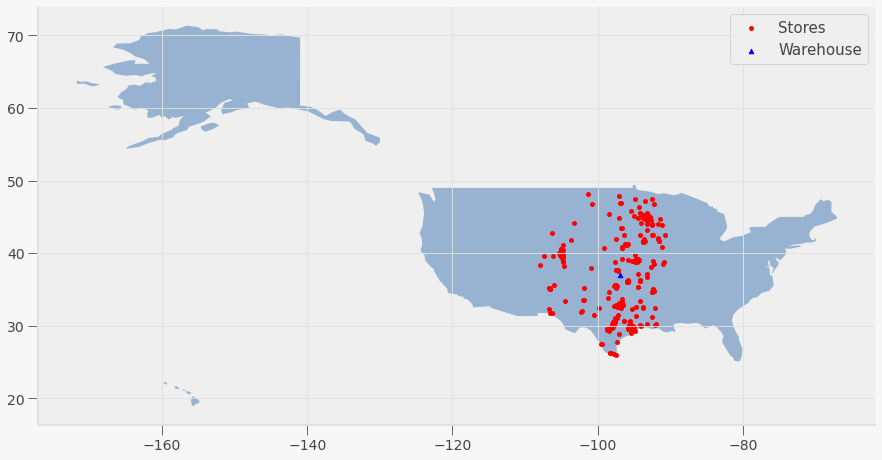

==== ALMACEN NUMERO 1 ====
 ** Address **
   City :  Hilltown Township
   State :  Pennsylvania
   Country :  United States
   Zip Code :  18962
 ** Stores Info **
   Number of Stores:  455
   Max Distance between Warehouse and Store:  732.1401808131197
   Min Distance between Warehouse and Store:  13.276533050242355


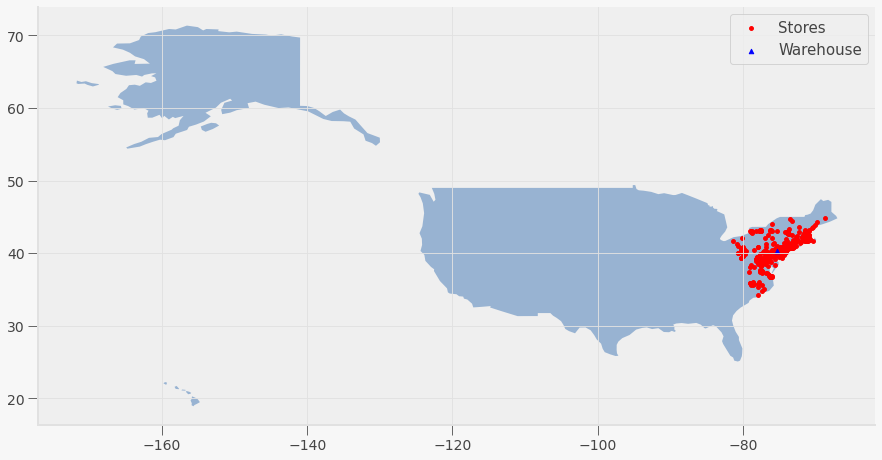

==== ALMACEN NUMERO 2 ====
 ** Address **
   City :  
   State :  California
   Country :  United States
   Zip Code :  None
 ** Stores Info **
   Number of Stores:  370
   Max Distance between Warehouse and Store:  4217.082553751027
   Min Distance between Warehouse and Store:  96.76188211144937


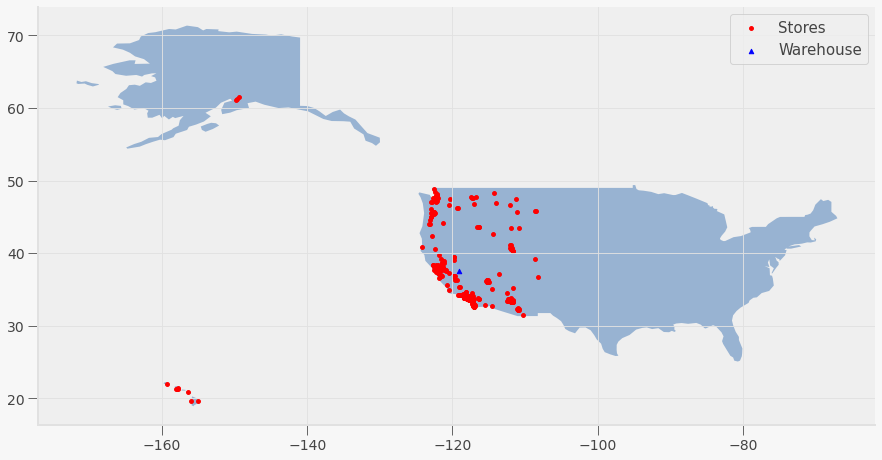

==== ALMACEN NUMERO 3 ====
 ** Address **
   City :  
   State :  Tennessee
   Country :  United States
   Zip Code :  None
 ** Stores Info **
   Number of Stores:  616
   Max Distance between Warehouse and Store:  1286.8432421978785
   Min Distance between Warehouse and Store:  91.4489238665344


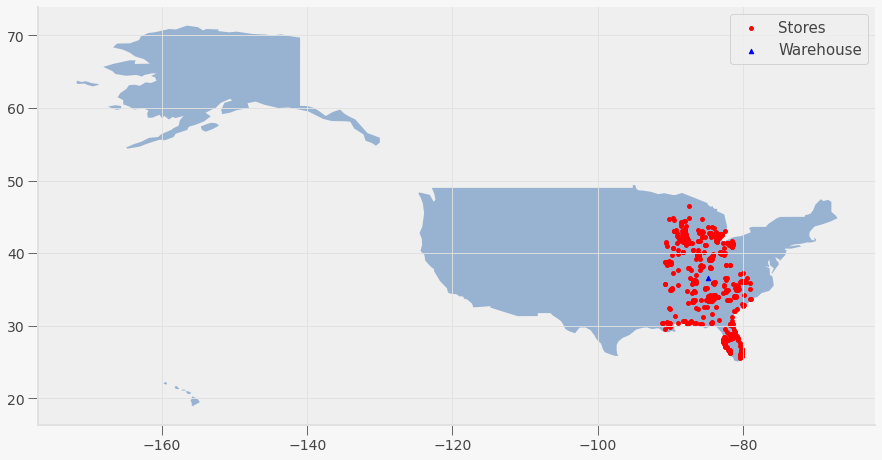

In [20]:
import geopy.distance
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

for gp in StoreHouseLoc.index:
    print("==== ALMACEN NUMERO " + str(gp) + " ====")
    location = geolocator.reverse(str(StoreHouseLoc["latitude"].iloc[gp])+","+str(StoreHouseLoc["longitude"].iloc[gp]))
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    code = address.get('country_code')
    zipcode = address.get('postcode')
    print(" ** Address **")
    print('   City : ',city)
    print('   State : ',state)
    print('   Country : ',country)
    print('   Zip Code : ', zipcode)
    
    print(" ** Stores Info **")
    NStores = dfFinal[dfFinal["GROUP"] == gp].count()[0]
    print("   Number of Stores: ",NStores)
    
    dist = []
    for row in dfFinal[dfFinal["GROUP"] == gp][dfFinal["Type"] == "Store"].iterrows():
        coords_1 = (row[1]["latitude"],row[1]["longitude"])
        coords_2 = (StoreHouseLoc["latitude"].iloc[gp],StoreHouseLoc["longitude"].iloc[gp])
        dist.append(geopy.distance.geodesic(coords_1, coords_2).km)
        
    print("   Max Distance between Warehouse and Store: ", max(dist))
    print("   Min Distance between Warehouse and Store: ", min(dist))
    
    geometry = [Point(xy) for xy in zip(dfFinal[dfFinal["GROUP"] == gp]['longitude'], dfFinal[dfFinal["GROUP"] == gp]['latitude'])]
    gdf = gpd.GeoDataFrame(data = dfFinal[dfFinal["GROUP"] == gp], geometry=geometry)   
    #this is a simple map that goes with geopandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    fig,ax = plt.subplots(figsize = (15,15))
    world.query("name == 'United States of America'").plot(ax = ax, alpha = 0.4)
    gdf[gdf["Type"] == "Store"].plot(ax=ax, marker='o', color='red', markersize=15, label = "Stores")
    gdf[gdf["Type"] == "Warehouse"].plot(ax=ax, marker='^', color='blue', markersize=20, label = "Warehouse")
    plt.legend(prop = {"size":15})
    plt.show()
    

Como podemos ver, la distancia, probablemente, no es la más óptima pero agrupa de manera correcta las tiendas en 4 sectores del país (Oeste, Centro-Oeste, Centro-Este, Este). 

Por parte de la visualización encontré que existen otros métodos dentro de las librerias de Geopandas pero este me pareció el más sencillo de utilziar. 